# Def:

Linear regression is a model that predicts a relationship of direct proportionality between the dependent variable (plotted on the vertical or Y axis) and the predictor variables (plotted on the X axis) that produces a straight line

# READING IN THE DATA WITH PANDAS

The first import is just to change how tables appear in the accompanying notebook, the rest will be explained once they're used:

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

downloading required data

In [2]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

merging all csv files on date column

In [3]:
df = (shiller.merge(housing_price_index, on='date')
                    .merge(unemployment, on='date')
                    .merge(federal_funds_rate, on='date')
                    .merge(gross_domestic_product, on='date'))

viewing the first few frames

In [4]:

df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


Usually, the next step after gathering data would be exploratory analysis. Exploratory analysis is the part of the process where we analyze the variables (with plots and descriptive statistics) and figure out the best predictors of our dependent variable.

For the sake of brevity, we'll skip the exploratory analysis. Keep in the back of your mind, though, that it's of utmost importance and that skipping it in the real world would preclude ever getting to the predictive section.

We'll use ordinary least squares (OLS), a basic yet powerful way to assess our model.

# ORDINARY LEAST SQUARES ASSUMPTIONS

Here are the OLS assumptions:

Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
    
No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
    
Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
    
Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
    
No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

# # SIMPLE LINEAR REGRESSION

Using statsmodels' ols function, we construct our model setting housing_price_index as a function of total_unemployed. We assume that an increase in the total number of unemployed people will have downward pressure on housing prices. Maybe we're wrong, but we have to start somewhere!

In [5]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

# summarize our model
print(housing_model.summary2())

                  Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.949   
Dependent Variable: housing_price_index AIC:                134.9005
Date:               2018-12-03 18:55    BIC:                137.1715
No. Observations:   23                  Log-Likelihood:     -65.450 
Df Model:           1                   F-statistic:        413.2   
Df Residuals:       21                  Prob (F-statistic): 2.71e-15
R-squared:          0.952               Scale:              19.000  
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept        313.3128   5.4077  57.9385 0.0000 302.0669 324.5587
total_unemployed  -8.3324   0.4099 -20.3268 0.0000  -9.1849  -7.4799
--------------------------------------------------------------------
Omnibus:               0.492         Durbin-Watson:  

# Explanation

To explain:

Adj. R-squared indicates that 95% of housing prices can be explained by our predictor variable, total_unemployed.

The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in total_unemployed reduces housing_price_index by 8.33. In line with our assumptions, an increase in unemployment appears to reduce housing prices.

The standard error measures the accuracy of total_unemployed's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard error, 0.41, is low and therefore appears accurate.

The p-value means the probability of an 8.33 decrease in housing_price_index due to a one unit increase in total_unemployed is 0%, assuming there is no relationship between the two variables. A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.

The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that total_unemployed's coefficient will be within our confidence interval, [-9.185, -7.480].

# REGRESSION PLOTS

Please see the four graphs below.

The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. The inverse relationship in our graph indicates that housing_price_index and total_unemployed are negatively correlated, i.e., when one variable increases the other decreases.

The “Residuals versus total_unemployed” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

The “Partial regression plot” shows the relationship between housing_price_index and total_unemployed, taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient. We'll see later how this same graph changes when we add more variables.

The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing total_unemployed coefficient

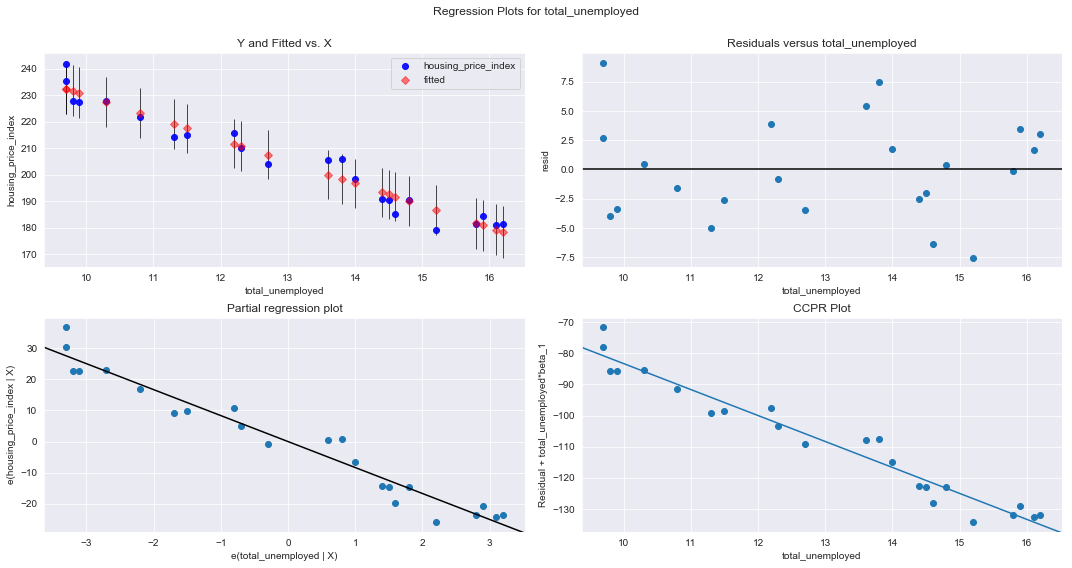

In [6]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed" , fig = fig)

# MULTIPLE LINEAR REGRESSION

We know that unemployment cannot entirely explain housing prices. To get a clearer picture of what influences housing prices, we add and test different variables and analyze the regression results to see which combinations of predictor variables satisfy OLS assumptions, while remaining intuitively appealing from an economic perspective.

We arrive at a model that contains the following variables: fed_funds, consumer_price_index, long_interest_rate, and gross_domestic_product, in addition to our original predictor, total_unemployed.

Adding the new variables decreased the impact of total_unemployed on housing_price_index. total_unemployed‘s impact is now more unpredictable (standard error increased from 0.41 to 2.399), and, since the p-value is higher (from 0 to 0.943), less likely to influence housing prices.

Although total_unemployed may be correlated with housing_price_index, our other predictors seem to capture more of the variation in housing prices. The real-world interconnectivity among our variables can't be encapsulated by a simple linear regression alone; a more robust model is required. This is why our multiple linear regression model's results change drastically when introducing new variables.

That all our newly introduced variables are statistically significant at the 5% threshold, and that our coefficients follow our assumptions, indicates that our multiple linear regression model is better than our simple linear model.

The code below sets up a multiple linear regression with our new predictor variables.

In [7]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data=df).fit()
# summarize our model
print(housing_model.summary())

                             OLS Regression Results                            
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Mon, 03 Dec 2018   Prob (F-statistic):           7.32e-14
Time:                         18:55:26   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

# ANOTHER LOOK AT PARTIAL REGRESSION PLOTS

Now let's plot our partial regression graphs again to visualize how the total_unemployedvariable was impacted by including the other predictors. The lack of trend in the partial regression plot for total_unemployed (in the figure below, upper right corner), relative to the regression plot for total_unemployed (above, lower left corner), indicates that total unemployment isn't as explanatory as the first model suggested.

We also see that the observations from the latest variables are consistently closer to the trend line than the observations for total_unemployment, which reaffirms that fed_funds, consumer_price_index, long_interest_rate, and gross_domestic_product do a better job of explaining housing_price_index.

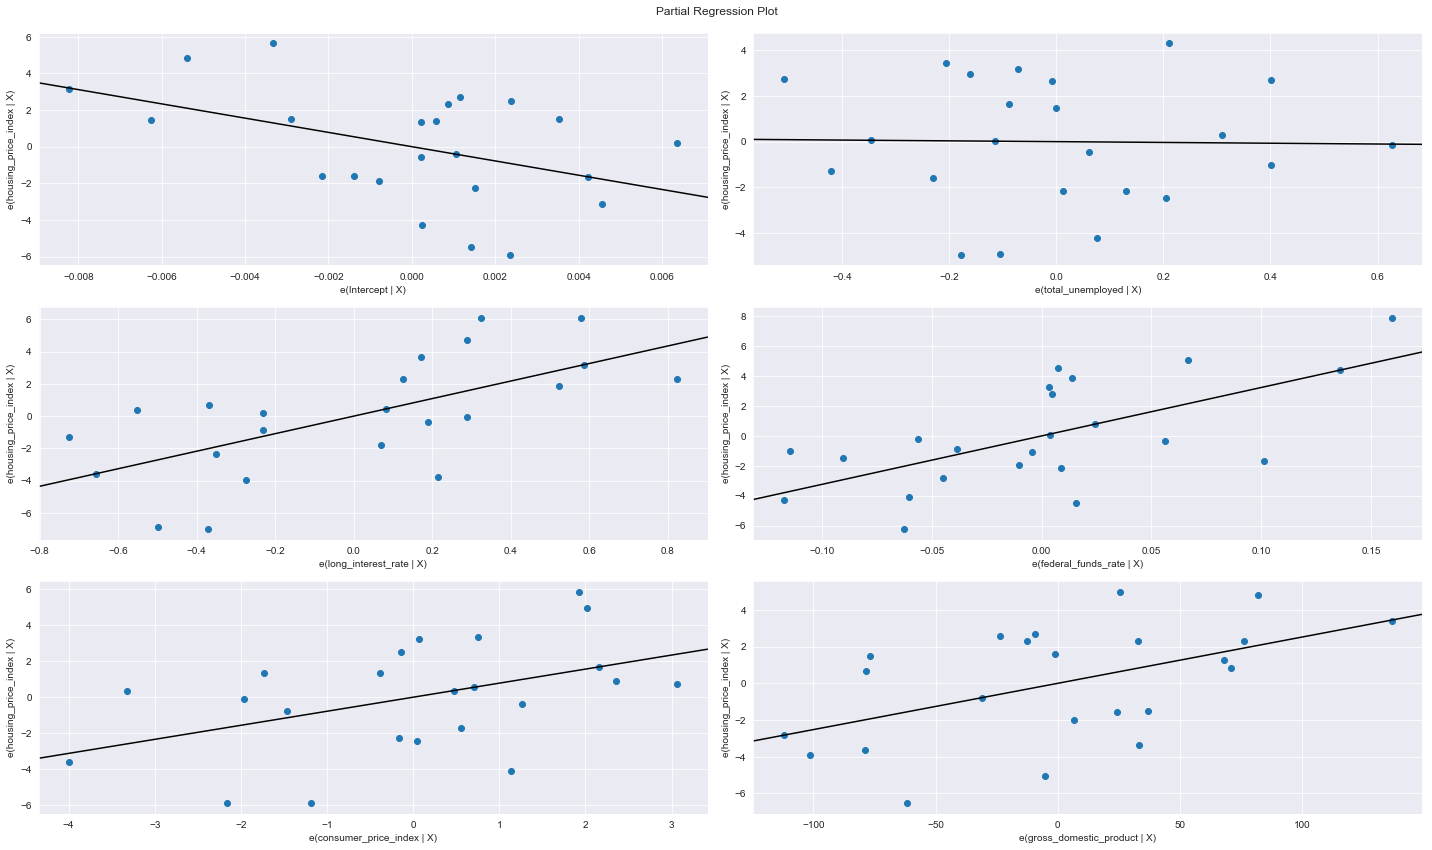

In [8]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

# Navigating Pitfalls

This post is an introduction to basic regression modeling, but experienced data scientists will find several flaws in our method and model, including:

No Lit Review: While it's tempting to dive in to the modeling process, ignoring the existing body of knowledge is perilous. A lit review might have revealed that linear regression isn't the proper model to predict housing prices. It also might have improved variable selection. And spending time on a lit review at the outset can save a lot of time in the long run.

Small sample size: Modeling something as complex as the housing market requires more than six years of data. Our small sample size is biased toward the events after the housing crisis and is not representative of long-term trends in the housing market.

Multicollinearity: A careful observer would've noticed the warnings produced by our model regarding multicollinearity. We have two or more variables telling roughly the same story, overstating the value of each of the predictors.

Autocorrelation: Autocorrelation occurs when past values of a predictor influence its current and future values. Careful reading of the Durbin-Watson score would've revealed that autocorrelation is present in our model.